<a href="https://colab.research.google.com/github/akhi106/akhi/blob/main/new_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/sample_data/2018-06-06-pdb-intersect-pisces.csv', nrows=9050)
df

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue
0,1FV1,F,NPVVHFFKNIVTPRTPPPSQ,CCCCCBCCCCCCCCCCCCCC,CCCCCECCCCCCCCCCCCCC,20,False,XRAY,1.90,0.23,0.27
1,1LM8,H,DLDLEMLAPYIPMDDDFQLR,CCCCCCCCCBCCSCCCEECC,CCCCCCCCCECCCCCCEECC,20,False,XRAY,1.85,0.20,0.24
2,1O06,A,EEDPDLKAAIQESLREAEEA,CCCHHHHHHHHHHHHHHHTC,CCCHHHHHHHHHHHHHHHCC,20,False,XRAY,1.45,0.19,0.22
3,1QOW,D,CTFTLPGGGGVCTLTSECI*,CCTTSCTTCSSTTSSTTCCC,CCCCCCCCCCCCCCCCCCCC,20,True,XRAY,1.06,0.14,1.00
4,1RDQ,I,TTYADFIASGRTGRRNAIHD,CHHHHHHTSSCSSCCCCEEC,CHHHHHHCCCCCCCCCCEEC,20,False,XRAY,1.26,0.13,0.16
...,...,...,...,...,...,...,...,...,...,...,...
9045,3TG7,A,ATPSMMPQWSYMHISGQDASEYLSPGLVQFARATETYFSLNNKFRN...,CCCCCCCHHHHHTSSSCCHHHHSCHHHHHHHHHHTTTSCCGGGSCC...,CCCCCCCHHHHHCCCCCCHHHHCCHHHHHHHHHHCCCCCCHHHCCC...,951,False,XRAY,1.57,0.19,0.22
9046,5DKX,A,GSEFVKEHDWKKCDQSGFCRRNRAYADHALSAISWESPYKIAPETG...,CCCCCSSCCCCCGGGSHHHHHHHHHHHHHHHSTTCCCSEEECGGGC...,CCCCCCCCCCCCHHHCHHHHHHHHHHHHHHHCCCCCCCEEECHHHC...,951,False,XRAY,1.40,0.15,0.17
9047,5JOV,A,MGSSHHHHHHSSGLEVLFQGPASNKVYEKTGDSVIVKVQHKETGGP...,CCCHHHHSCCCCCCCCCTTSCGGGSSEEECSSEEEEECSSCCTTSC...,CCCHHHHCCCCCCCCCCCCCCHHHCCEEECCCEEEEECCCCCCCCC...,955,False,XRAY,1.50,0.11,0.15
9048,2OKX,B,MAGRNWNASWIWGGQEESPRNEWRCFRGSFDAPASVEGPAMLHITA...,CCCCCCCSEEEECSSCSSCTTEEEEEEEEEECCSCCCSCCEEEEEE...,CCCCCCCCEEEECCCCCCCCCEEEEEEEEEECCCCCCCCCEEEEEE...,956,False,XRAY,1.90,0.18,0.21


In [3]:
df.head(5)

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue
0,1FV1,F,NPVVHFFKNIVTPRTPPPSQ,CCCCCBCCCCCCCCCCCCCC,CCCCCECCCCCCCCCCCCCC,20,False,XRAY,1.90,0.23,0.27
1,1LM8,H,DLDLEMLAPYIPMDDDFQLR,CCCCCCCCCBCCSCCCEECC,CCCCCCCCCECCCCCCEECC,20,False,XRAY,1.85,0.20,0.24
2,1O06,A,EEDPDLKAAIQESLREAEEA,CCCHHHHHHHHHHHHHHHTC,CCCHHHHHHHHHHHHHHHCC,20,False,XRAY,1.45,0.19,0.22
3,1QOW,D,CTFTLPGGGGVCTLTSECI*,CCTTSCTTCSSTTSSTTCCC,CCCCCCCCCCCCCCCCCCCC,20,True,XRAY,1.06,0.14,1.00
4,1RDQ,I,TTYADFIASGRTGRRNAIHD,CHHHHHHTSSCSSCCCCEEC,CHHHHHHCCCCCCCCCCEEC,20,False,XRAY,1.26,0.13,0.16


In [4]:
df = df[['seq','len','sst3']][(df['len']<9000)&(df['has_nonstd_aa']==False)]
df.drop_duplicates(subset='seq',inplace=True)
df.head(500)

,seq,len,sst3
0,NPVVHFFKNIVTPRTPPPSQ,20,CCCCCECCCCCCCCCCCCCC
1,DLDLEMLAPYIPMDDDFQLR,20,CCCCCCCCCECCCCCCEECC
2,EEDPDLKAAIQESLREAEEA,20,CCCHHHHHHHHHHHHHHHCC
4,TTYADFIASGRTGRRNAIHD,20,CHHHHHHCCCCCCCCCCEEC
5,QDSRRSADALLRLQAMAGIS,20,CHHHHHHHHHHHHHHHHCCC
...,...,...,...
540,VKDGYIVDDVNCTYFCGRNAYCNEECTKLKGESGYCQWASPYGNAC...,64,CEEEEEECCCCCECCCCCHHHHHHHHHHCCCCEEEEEEEECCEEEE...
541,TAAVALVKANENAAAILNLKNAIQKTNAAVADVVQATQSLGTAVQA...,64,CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...
542,NKASVVANQLIPINTALTLIMMKAEVVTPMGIPAEEIPKLVGMQVN...,64,CCCEEEECCCECCCCECCHHHEEEECCCCCCCEHHHHHHHCCCEEC...
543,GSHMPVPSFGEAMAYFAMVKRYLTSFPIDDRVQSHILHLEHDLVHV...,64,CCCCCCCCHHHHHHHHHHHHHHHHCCCCCHHHHHHHHHHHHHHHHH...


In [5]:
def clear_asterisks(df, seqs_column_name, pct=30):
    indices = []
    for i, seq in enumerate(df[seqs_column_name]):
        if (seq.count('*')*100/len(seq)) <= pct: indices.append(i)
    return df.iloc[indices]

df = clear_asterisks(df,'seq')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8967 entries, 0 to 9049
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   seq     8967 non-null   object
 1   len     8967 non-null   int64 
 2   sst3    8967 non-null   object
dtypes: int64(1), object(2)
memory usage: 280.2+ KB


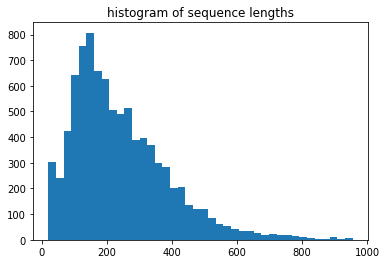

In [6]:
plt.hist(x='len',data=df,bins=40,histtype='bar');
plt.title('histogram of sequence lengths');

dict_a:   {'C': 60991, 'H': 87666, 'E': 30074}
dict_f:   {'C': 27214, 'H': 31219, 'E': 28219}
dict_p:   {'C': 70957, 'H': 19162, 'E': 9792}
dict_s:   {'C': 72423, 'H': 38172, 'E': 25181}


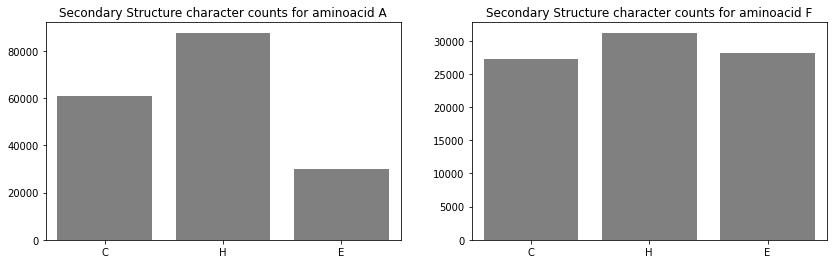

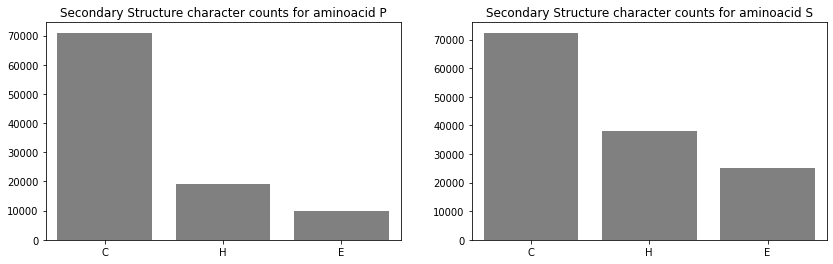

In [7]:
dict_a = {'C':[],'H':[],'E':[]}
dict_f = {'C':[],'H':[],'E':[]}
dict_p = {'C':[],'H':[],'E':[]}
dict_s = {'C':[],'H':[],'E':[]}

for se,sst in zip(df['seq'],df['sst3']):
    for s,ss in zip(se,sst):
        if s == 'A':
            if ss == 'C': dict_a['C'].append(1)
            elif ss == 'H': dict_a['H'].append(1)
            elif ss == 'E': dict_a['E'].append(1)
        elif s == 'F':        
            if ss == 'C': dict_f['C'].append(1)
            elif ss == 'H': dict_f['H'].append(1)
            elif ss == 'E': dict_f['E'].append(1)
        elif s == 'P':        
            if ss == 'C': dict_p['C'].append(1)
            elif ss == 'H': dict_p['H'].append(1)
            elif ss == 'E': dict_p['E'].append(1)
        elif s == 'S':        
            if ss == 'C': dict_s['C'].append(1)
            elif ss == 'H': dict_s['H'].append(1)
            elif ss == 'E': dict_s['E'].append(1)
                
                
for k in dict_a.keys(): dict_a[k] = sum(dict_a[k])
for k in dict_f.keys(): dict_f[k] = sum(dict_f[k])
for k in dict_p.keys(): dict_p[k] = sum(dict_p[k])
for k in dict_s.keys(): dict_s[k] = sum(dict_s[k])
print('dict_a:  ',dict_a)
print('dict_f:  ',dict_f)
print('dict_p:  ',dict_p)
print('dict_s:  ',dict_s)


plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_a.keys()),y=list(dict_a.values()),color='gray');
plt.title('Secondary Structure character counts for aminoacid A');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_f.keys()),y=list(dict_f.values()),color='gray');
plt.title('Secondary Structure character counts for aminoacid F');
plt.figure(figsize=(14,4));
plt.subplot(1,2,1);
sns.barplot(x=list(dict_p.keys()),y=list(dict_p.values()),color='gray');
plt.title('Secondary Structure character counts for aminoacid P');
plt.subplot(1,2,2);
sns.barplot(x=list(dict_s.keys()),y=list(dict_s.values()),color='gray');
plt.title('Secondary Structure character counts for aminoacid S');

In [8]:
def ngrams(seq,n=3):
    return ([seq[i:i+n] for i in range(len(seq)-n+1)])

df['seqss']=df['seq'].apply(ngrams)
df.head()

,seq,len,sst3,seqss
0,NPVVHFFKNIVTPRTPPPSQ,20,CCCCCECCCCCCCCCCCCCC,"[NPV, PVV, VVH, VHF, HFF, FFK, FKN, KNI, NIV, ..."
1,DLDLEMLAPYIPMDDDFQLR,20,CCCCCCCCCECCCCCCEECC,"[DLD, LDL, DLE, LEM, EML, MLA, LAP, APY, PYI, ..."
2,EEDPDLKAAIQESLREAEEA,20,CCCHHHHHHHHHHHHHHHCC,"[EED, EDP, DPD, PDL, DLK, LKA, KAA, AAI, AIQ, ..."
4,TTYADFIASGRTGRRNAIHD,20,CHHHHHHCCCCCCCCCCEEC,"[TTY, TYA, YAD, ADF, DFI, FIA, IAS, ASG, SGR, ..."
5,QDSRRSADALLRLQAMAGIS,20,CHHHHHHHHHHHHHHHHCCC,"[QDS, DSR, SRR, RRS, RSA, SAD, ADA, DAL, ALL, ..."


In [9]:
# function to calculate maximum length
# we could simply use df['len'].max(), but let's compute it just in case
def max_length(series):
    l = []
    [l.append(len(s)) for s in series]
    return max(l)

maxlen = max_length(df['seq'])
maxlen

956

In [10]:
import tensorflow as tf
import keras as k

In [11]:
# tokenize, then pad sequences into uniform length
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

tok_x = Tokenizer(lower=False)
tok_x.fit_on_texts(df['seqss'].values)
x = tok_x.texts_to_sequences(df['seqss'].values)
x = sequence.pad_sequences(x, maxlen=maxlen, padding='post')

tok_y = Tokenizer(char_level=True)
tok_y.fit_on_texts(df['sst3'].values)
y = tok_y.texts_to_sequences(df['sst3'].values)
y = sequence.pad_sequences(y, maxlen=maxlen, padding='post')
y = to_categorical(y)

print(x.shape)
print(y.shape)

(8967, 956)
(8967, 956, 4)


In [12]:
# split data into train and test sets 
from sklearn.model_selection import train_test_split

x_tr, x_ts, y_tr, y_ts = train_test_split(x,y,test_size=0.3, random_state=33)
x_tr.shape, y_tr.shape, x_ts.shape, y_ts.shape

((6276, 956), (6276, 956, 4), (2691, 956), (2691, 956, 4))

In [13]:
#import libraries and calculate hyperparameters about train-data dimensions
from keras.models import Sequential
from keras.layers import Embedding, Dense, TimeDistributed, Bidirectional, GRU, LSTM
n_ngrams = len(tok_x.word_index) + 1
n_tags = len(tok_y.word_index) + 1

In [14]:
gru = Sequential()
gru.add(Embedding(input_dim=n_ngrams,output_dim=x.shape[0]//12,input_length=maxlen))
gru.add(Bidirectional(GRU(x.shape[0]//24,return_sequences=True, recurrent_dropout=0.1)))
gru.add(TimeDistributed(Dense(n_tags,input_dim=y.shape[2],activation='softmax')))
gru.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 956, 747)          5976747   
_________________________________________________________________
bidirectional (Bidirectional (None, 956, 746)          2511036   
_________________________________________________________________
time_distributed (TimeDistri (None, 956, 4)            2988      
Total params: 8,490,771
Trainable params: 8,490,771
Non-trainable params: 0
_________________________________________________________________


In [15]:
gru.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
gru.fit(x_tr,y_tr,epochs=1,validation_split=0.1,verbose=1)

177/177 [==============================] - 9636s 54s/step - loss: 0.2801 - acc: 0.8607 - val_loss: 0.1926 - val_acc: 0.9152


In [16]:
#regular accuracy
evals = gru.evaluate(x_ts,y_ts)
print('accuracy:', evals[1]*100)

85/85 [==============================] - 658s 8s/step - loss: 0.1995 - acc: 0.9121
accuracy: 91.2065863609314


In [17]:
# q3 accuracy
from keras import backend  as K
import tensorflow as tf


def q3_acc(y_true, y_pred):
    y = tf.argmax(y_true, axis=-1)
    y_ = tf.argmax(y_pred, axis=-1)
    mask = tf.greater(y, 0)
    q3 = K.cast(K.equal(tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)), K.floatx())
    return sum(q3) / q3.shape[0]

preds = gru.predict(x_ts)
print(q3_acc(y_ts,preds))

tf.Tensor(0.65651065, shape=(), dtype=float32)
